In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [95]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [96]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [6]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    N = len(y)
    e = y - np.dot(tx, w)
    return np.dot(e.T, e)/(2*N)

# 2 Grid Search

Fill in the function `grid_search()` below:

In [7]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i, w0_n in enumerate(w0):
        for j, w1_n in enumerate(w1):
            losses[i, j] = compute_loss(y, tx, [w0_n, w1_n])
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.424483146782485, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.013 seconds


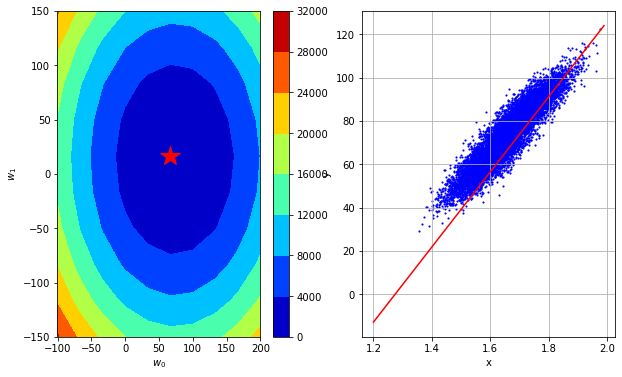

In [8]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

Grid Search: loss*=20.759339381144194, w0*=75.86206896551724, w1*=15.517241379310349, execution time=0.080 seconds


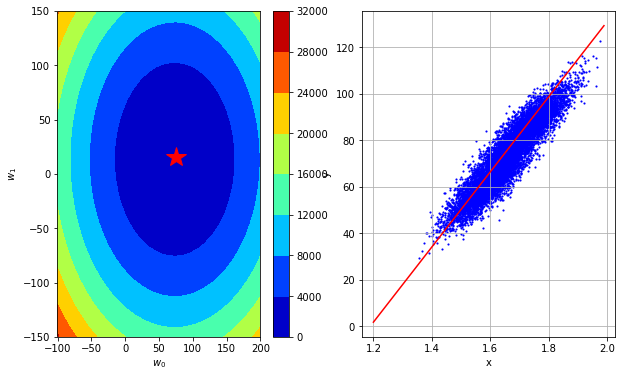

In [12]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=30)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [13]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    N = len(y)
    e = y - np.dot(tx, w)
    return np.dot(tx.T, e)/(-N)

In [14]:
#exercise 3, b)

w_1 = [100, 20]
grad_1 = compute_gradient(y, tx, w_1)
w_2 = [50, 10]
grad_2 = compute_gradient(y, tx, w_2)
print("grad with w=[100, 20]: " + str(grad_1))
print("grad with w=[50, 10]: " + str(grad_2))

grad with w=[100, 20]: [26.706078    6.52028757]
grad with w=[50, 10]: [-23.293922    -3.47971243]


In [16]:
print("norm of grad with w=[100, 20]: " + str(np.linalg.norm(grad_1)))
print("norm of grad with w=[50, 10]: " + str(np.linalg.norm(grad_2)))

norm of grad with w=[100, 20]: 27.49052112929254
norm of grad with w=[50, 10]: 23.552392678247738


In [21]:
compute_loss(y, tx, w_2)

292.7434883040181

Please fill in the functions `gradient_descent` below:

In [17]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [18]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759167, w0=51.30574540147352, w1=9.435798704492393
Gradient Descent(1/49): loss=265.30246210896195, w0=66.69746902191565, w1=12.266538315840034
Gradient Descent(2/49): loss=37.87837955044161, w0=71.31498610804833, w1=13.115760199244338
Gradient Descent(3/49): loss=17.410212120174496, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450457, w0=73.11581777164008, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265291, w0=73.24049073296567, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136332, w1=13.476764421879517
Gradient Descent(7/49): loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638305, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.3858879656522, w0=73.29379216412119, w1=13.4

In [19]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [41]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=1062606.4462798766, w0=-892.6706077997892, w1=901.3479712434987
Gradient Descent(1/49): loss=860714.1448053947, w0=-796.0741548195997, w1=812.5611453626478
Gradient Descent(2/49): loss=697181.3806110648, w0=-709.1373471374291, w1=732.6530020698818
Gradient Descent(3/49): loss=564719.8416136574, w0=-630.8942202234755, w1=660.7356731063923
Gradient Descent(4/49): loss=457425.9950257573, w0=-560.4754060009174, w1=596.0100770392519
Gradient Descent(5/49): loss=370517.97928955837, w0=-497.098473200615, w1=537.7570405788256
Gradient Descent(6/49): loss=300122.4865432373, w0=-440.0592336803431, w1=485.3293077644419
Gradient Descent(7/49): loss=243102.13741871735, w0=-388.7239181120984, w1=438.1443482314964
Gradient Descent(8/49): loss=196915.65462785607, w0=-342.5221341006778, w1=395.67788465184566
Gradient Descent(9/49): loss=159504.60356725843, w0=-300.94052849039934, w1=357.45806743016
Gradient Descent(10/49): loss=129201.65220817432, w0=-263.5170834411488, w1=

In [42]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [65]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    #N = len(y)
    #L_n = [compute_gradient(y_n, tx[idx,:], w) for idx, y_n in enumerate(y)]
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            grad = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            mini_batch_loss = compute_loss(minibatch_tx, minibatch_tx, w)
            loss = np.sum(mini_batch_loss)/len(mini_batch_loss)
            w = w - gamma*grad
            ws.append(w)
            losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
          bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [70]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=0.053095725219896917, w0=46.62177382988366, w1=-25.13612033752071
Gradient Descent(1/49): loss=823.5025296547115, w0=84.18171477010792, w1=0.3936192068547868
Gradient Descent(2/49): loss=6986.435742548875, w0=87.20189069217678, w1=3.142173636986493
Gradient Descent(3/49): loss=7615.363435291327, w0=79.30224373808656, w1=1.4554346755915248
Gradient Descent(4/49): loss=6217.219280592348, w0=78.27107698676862, w1=1.40459945038579
Gradient Descent(5/49): loss=6075.5395397912025, w0=74.15545244028776, w1=0.6099075080418793
Gradient Descent(6/49): loss=5413.756473862447, w0=64.59011825540543, w1=7.3303136482327025
Gradient Descent(7/49): loss=3897.3311207008983, w0=65.02745370073838, w1=7.223929478889972
Gradient Descent(8/49): loss=4135.722705643811, w0=74.23617114635417, w1=6.9255485180038185
Gradient Descent(9/49): loss=7762.771649437467, w0=86.93023332941621, w1=35.31519062987136
Gradient Descent(10/49): loss=10398.190895962402, w0=73.30589830606523, w1=29.23

In [71]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


In [146]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

Grid Search: loss*=109.17758755205352, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.003 seconds


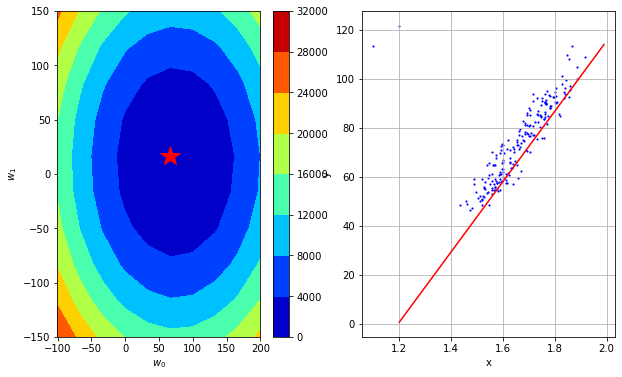

In [85]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

In [86]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2869.8351145358524, w0=51.84746409844842, w1=7.7244264061924195
Gradient Descent(1/49): loss=318.2821247015965, w0=67.40170332798297, w1=10.041754328050114
Gradient Descent(2/49): loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607411
Gradient Descent(3/49): loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574597
Gradient Descent(4/49): loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/49): loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
Gradient Descent(6/49): loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481914
Gradient Descent(7/49): loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
Gradient Descent(8/49): loss=65.93074217249234, w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/49): loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038408
Gradient Descent(10/49): loss=65.93073020036947, w0=74.06767464603033, w1=11.034875

In [87]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [119]:
def compute_loss_mae(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - np.dot(tx, w)
    return np.mean(np.abs(e))

In [136]:
def subgrad(y_n, tx_n, w):
    f_w = np.dot(tx_n.T, w)
    if(y_n == f_w):
        return [0, 0]
    elif(y_n > f_w):
        return [1, tx_n[1]]
    else:
        return [-1, -tx_n[1]]

def compute_subgradient_mae(y, tx, w):
    e = y - np.dot(tx, w)
    grads = [subgrad(y_n, tx[idx,:], w) for idx, y_n in enumerate(y)]
    return - np.mean(grads, axis=0)

In [137]:
w_1 = [100, 20]
grad_1 = compute_subgradient_mae(y, tx, w_1)
w_2 = [50, 10]
grad_2 = compute_subgradient_mae(y, tx, w_2)
print("grad with w=[100, 20]: " + str(grad_1))
print("grad with w=[50, 10]: " + str(grad_2))

grad with w=[100, 20]: [0.998      0.00414807]
grad with w=[50, 10]: [-9.99800000e-01 -5.74162427e-05]


In [138]:
def gradient_descent_mae(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        grad = compute_subgradient_mae(y, tx, w)
        loss = compute_loss_mae(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [139]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent_mae(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=73.29392200210518, w0=0.7, w1=-1.5529755259535704e-15
Gradient Descent(1/49): loss=72.59392200210517, w0=1.4, w1=-3.1059510519071408e-15
Gradient Descent(2/49): loss=71.89392200210517, w0=2.0999999999999996, w1=-4.658926577860711e-15
Gradient Descent(3/49): loss=71.19392200210518, w0=2.8, w1=-6.2119021038142816e-15
Gradient Descent(4/49): loss=70.49392200210517, w0=3.5, w1=-7.764877629767851e-15
Gradient Descent(5/49): loss=69.79392200210518, w0=4.2, w1=-9.317853155721422e-15
Gradient Descent(6/49): loss=69.09392200210519, w0=4.9, w1=-1.0870828681674993e-14
Gradient Descent(7/49): loss=68.39392200210517, w0=5.6000000000000005, w1=-1.2423804207628563e-14
Gradient Descent(8/49): loss=67.69392200210518, w0=6.300000000000001, w1=-1.3976779733582134e-14
Gradient Descent(9/49): loss=66.99392200210517, w0=7.000000000000001, w1=-1.5529755259535703e-14
Gradient Descent(10/49): loss=66.29392200210518, w0=7.700000000000001, w1=-1.7082730785489272e-14
Gradient Descent(

In [140]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [143]:
def stochastic_gradient_descent_mae(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            grad = compute_subgradient_mae(minibatch_y, minibatch_tx, w)
            mini_batch_loss = compute_loss_mae(minibatch_tx, minibatch_tx, w)
            loss = np.mean(mini_batch_loss)
            w = w - gamma*grad
            ws.append(w)
            losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
          bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [147]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent_mae(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=0.9508323857106089, w0=0.7, w1=0.6311653399948525
Gradient Descent(1/49): loss=1.0025035131363305, w0=1.4, w1=-0.07233957839601013
Gradient Descent(2/49): loss=0.9660760364739645, w0=2.0999999999999996, w1=-0.15315388388472118
Gradient Descent(3/49): loss=1.3479400314381458, w0=2.8, w1=0.11698456640494886
Gradient Descent(4/49): loss=2.4003860355897855, w0=3.5, w1=-0.06648121264547047
Gradient Descent(5/49): loss=2.3963044890566962, w0=4.2, w1=0.6795044409419265
Gradient Descent(6/49): loss=3.750969225856982, w0=4.9, w1=0.878265306760451
Gradient Descent(7/49): loss=4.5238125531690345, w0=5.6000000000000005, w1=1.1073869990472092
Gradient Descent(8/49): loss=5.481720553101341, w0=6.300000000000001, w1=1.5473114419313911
Gradient Descent(9/49): loss=5.751481041592518, w0=7.000000000000001, w1=1.5148824341640315
Gradient Descent(10/49): loss=8.033799516760773, w0=7.700000000000001, w1=2.5727977409915894
Gradient Descent(11/49): loss=6.843169197021481, w0=8.4,

In [148]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>